Devivaraprasad Rathikindi RW Assessment Level-3

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df_books = pd.read_csv("D:/COLLEGE/RandWalk_DS_L3/RandWalk-DS-Assessment-Level3/books.csv")
df_book_tags = pd.read_csv("D:/COLLEGE/RandWalk_DS_L3/RandWalk-DS-Assessment-Level3/book_tags.csv")
df_ratings = pd.read_csv("D:/COLLEGE/RandWalk_DS_L3/RandWalk-DS-Assessment-Level3/ratings.csv")

In [8]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [10]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
4200,9522,30574,22451
4201,9522,13561,301
4202,9522,7778,178
4203,9522,11557,165
4204,9522,13547,164


In [11]:
df_ratings.head()

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


Q1 How many books do not have an original title [books.csv]?

In [5]:
dont_have_title = df_books['original_title'].isnull().sum()
dont_have_title

36

Q2 How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [7]:
df_books = df_books.dropna(subset=['original_title'])

df_book_tags = df_book_tags[df_book_tags['goodreads_book_id'].isin(df_books['book_id'])]
df_ratings = df_ratings[df_ratings['book_id'].isin(df_ratings['book_id'])]

unique_books = df_books['book_id'].nunique()
unique_books

363

3 How many unique users are present in the dataset [ratings.csv] ?

In [13]:
unique_users = df_ratings['user_id'].nunique()
unique_users

40836

4 How many unique tags are there in the dataset [book_tags.csv] ?

In [15]:
unique_tags = df_book_tags['tag_id'].nunique()
unique_tags

100

5 Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [18]:
tag_counts = df_book_tags['tag_id'].value_counts()

most_freq = tag_counts.idxmax()
most_freq

30574

6 Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [17]:
df_merged = pd.merge(df_book_tags, df_books, left_on='goodreads_book_id', right_on='book_id')
book_tag_count = df_merged.groupby('title')['count'].sum()
most_tagged = book_tag_count.idxmax()
most_tagged

'Beyond Band of Brothers: The War Memoirs of Major Dick Winters'

7 Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

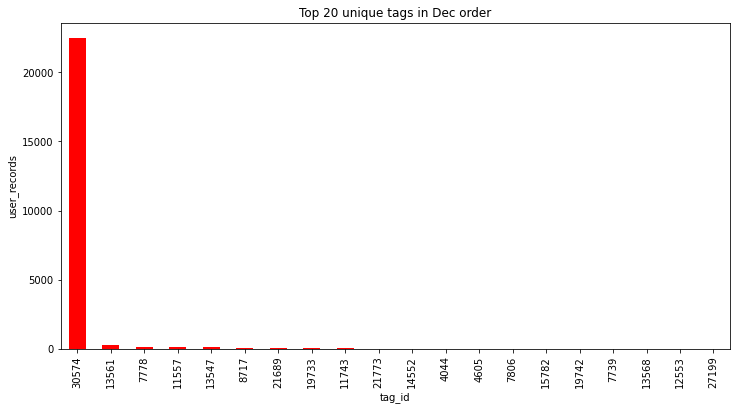

In [22]:
tag_countss = df_book_tags.groupby('tag_id')['count'].sum()

top_tags = tag_countss.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
top_tags.plot(kind='bar',color='red')
plt.title('Top 20 unique tags in Dec order')
plt.xlabel('tag_id')
plt.ylabel('user_records')
plt.show()